# Analiza eksploracyjna

### 09.01.2020 Aleksei Haidukevich, Joanna Smolska

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Skonstruowaliśmy zbiór danych z tablic opublikowanych na Eurostat. Zbieraliśmy dane jak najnowsze, ale niestety, w niektórych przypadkach oznaczało to 2015 rok. 

Ciekawą statystyką jest wynik ankiety o poziomie zadowolenia z życia w danym kraju. Od razu pojawiają się pytania: jakie czynniki teoretycznie mogą na to wpływać? Czy dałoby się użyć mechanizmu regresji, aby dobrze przewidzieć odpowiedź ludzi w danym kraju?

Wybraliśmy jeszcze 8 cech, które według nas mogą mieć wpływ na poziom zadowolenia populacji.

In [2]:
raw = pd.read_excel('../data/raw.xlsx', header=0)
raw

,country,population,happiness,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
0,Austria,8858775,39.7,10.4,18.40,71.4,39.6,21.688730,1500.00,0.1
1,Belgium,11467923,21.2,18.0,20.55,74.5,48.2,19.798485,1501.82,1.8
2,Bulgaria,7000039,9.5,13.0,6.68,66.4,33.4,40.456639,184.07,1.9
3,Croatia,4076246,16.5,11.2,9.02,60.7,37.9,25.021464,395.61,1.4
4,Cyprus,875898,22.4,30.2,8.85,76.3,22.4,39.968136,870.00,1.4
5,Czechia,10649800,29.5,7.7,17.15,61.6,35.7,21.459401,331.71,0.3
6,Denmark,5806081,41.3,16.4,15.70,71.3,48.3,14.802751,3200.00,1.3
7,Estonia,1324820,19.4,13.6,16.78,54.6,42.2,10.146950,390.00,16.4
8,Finland,5517919,41.1,4.6,20.88,68.7,48.5,12.018582,800.00,4.7
9,France,67028048,18.3,12.7,19.75,67.8,44.9,22.351132,1457.52,1.2


## Opis cech

`country`

Jedyna kategoryczna cecha w zbiorze. Dane o 33 krajach, z których 28 są w UE, pozostałe to - Iceland, Norway, Turkey, Switzerland, Serbia).

`population`

Populacja kraju (1 stycznia 2019).

`happiness`

Procent populacji (16+ lat), który okreslił zadowolenie z życia w swoim kraju jako "High" podczas ankiety 2018 roku.

`bad_conditions`

Procent populacji, który mieszka w złych warunkach (leaking roof, damp walls, rot in window frames, itp.) w 2019 roku.

`culture`

Procent populacji (16+ lat), który bierze udział w wydarzeniach kulturalnych (kino, teatr, wydarzenia sportowe, itp.) minimum 4 razy za 2015 rok.


`health_estimate`

Procent populacji (16+ lat), który okreslił stan własnego zdrowia jako "good" albo "very good" podczas ankiety 2018 roku.


`commute`

Średni czas dojazdu od domu do pracy w jedną stronę w 2015.

`education_underachievements`

Procent 15-latków, którym nie udało się otrzymać poziomu 2 (‘basic skills level’) na skali PISA w trzech dziedzinach (czytanie, matematyka, nauki ścisłe). Skala PISA dąży do oceny poziomu edukacji w kraju.

`minimum_wage`

Minimalny zarobek (EUR) zatrudnionych pracowników w kraju na 1 stycznia 2015.

`unmet_medical_needs`

Procent populacji (16+ lat), który deklarował nieokazanie pomocy miedycznej w przypadku, gdy jej potrzebował.


## Analiza zbioru

Na skutek tego, że dane dotyczą krajów europejskich, analizowany zbiór nie jest duży. Niemniej jednak, jak zobaczymy poniżej, dobrze nadaje się do analizy. Pierwszą rzeczą, którą się zajęliśmy, to uzupełnianie wartości NaN oraz wartości zerowych (nie możemy sobie pozwolić na wyrzucanie danych). Rozpatrujemy cechy `culture`, `commute` oraz `happiness`.

In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
country                        33 non-null object
population                     33 non-null int64
happiness                      31 non-null float64
bad_conditions                 33 non-null float64
culture                        32 non-null float64
health_estimate                33 non-null float64
commute                        28 non-null float64
education_underachievements    33 non-null float64
minimum_wage                   33 non-null float64
unmet_medical_needs            33 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 2.7+ KB


## Cecha `commute`

Uzupełniliśmy czas dojazdu do pracy średnią wartością europejską:

In [4]:
nan_commute = raw[raw['commute'].isna()]['country']
raw[raw['commute'].isna()]

,country,population,happiness,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
13,Iceland,356991,NaN,18.6,30.40,75.8,NaN,23.630610,2190.00,2.9
21,Norway,5328212,39.7,6.8,25.65,75.8,NaN,16.827050,2744.00,1.4
25,Serbia,6963764,7.5,16.6,7.48,56.4,NaN,35.586222,235.04,5.8
30,Switzerland,8542323,38.0,9.8,30.85,81.4,NaN,18.014392,0.00,0.7
31,Turkey,82003882,NaN,38.1,NaN,68.7,NaN,45.060331,424.26,2.6


In [5]:
raw['commute'].fillna(raw['commute'].mean(), inplace=True)
raw[raw['country'].isin(nan_commute)]

,country,population,happiness,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
13,Iceland,356991,NaN,18.6,30.40,75.8,40.378571,23.630610,2190.00,2.9
21,Norway,5328212,39.7,6.8,25.65,75.8,40.378571,16.827050,2744.00,1.4
25,Serbia,6963764,7.5,16.6,7.48,56.4,40.378571,35.586222,235.04,5.8
30,Switzerland,8542323,38.0,9.8,30.85,81.4,40.378571,18.014392,0.00,0.7
31,Turkey,82003882,NaN,38.1,NaN,68.7,40.378571,45.060331,424.26,2.6


## Cecha `culture`

Analogicznie uzupełniliśmy brak wartości dla Turcji:

In [6]:
raw[raw['culture'].isna()]

,country,population,happiness,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
31,Turkey,82003882,NaN,38.1,NaN,68.7,40.378571,45.060331,424.26,2.6


In [7]:
raw['culture'].fillna(raw['culture'].mean(), inplace=True)

In [8]:
raw[raw['country']=='Turkey']

,country,population,happiness,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
31,Turkey,82003882,NaN,38.1,15.846875,68.7,40.378571,45.060331,424.26,2.6


## Cecha `minimum_wage`

Kraje `Italy` oraz `Switzerland` nie mają podanej minimalnej płacy miesięcznej, więc dane te znaleźliśmy w alternatywnych źródłach.

In [9]:
raw.loc[raw['country']=='Italy', 'minimum_wage'] = 685
raw.loc[raw['country']=='Switzerland', 'minimum_wage'] = 1160

## Cecha `happiness`

Dla uzupełniania cechy `happiness` logika jest następująca: chcemy wziąć średnią z pewnej liczby krajów najbardziej podobnych do uzupełnianego. W tym celu utworzyliśmy normalizowany zbiór (wyrzuciliśmy na razie cechę `population`, ponieważ, jak się wkrótce okaże, nie ma ona praktycznie żadnego wpływu na poziom szczęścia ludzi).

In [10]:
raw[raw['happiness'].isna()]

,country,population,happiness,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
13,Iceland,356991,NaN,18.6,30.400000,75.8,40.378571,23.630610,2190.00,2.9
31,Turkey,82003882,NaN,38.1,15.846875,68.7,40.378571,45.060331,424.26,2.6


In [11]:
from sklearn import preprocessing

cols_to_drop = ['country', 'happiness', 'population']

cols = [e for e in raw.columns if e not in cols_to_drop]

x = raw.drop(cols_to_drop, axis=1).values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
raw_std = pd.DataFrame(x_scaled, columns=cols)
raw_std.index = raw['country']
print(raw_std.shape)
raw_std

(33, 7)


,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
country,,,,,,,
Austria,0.173134,0.529301,0.691139,0.571429,0.330583,0.436326,0.000000
Belgium,0.400000,0.610586,0.769620,0.857143,0.276442,0.436930,0.104294
Bulgaria,0.250746,0.086200,0.564557,0.365449,0.868140,0.000000,0.110429
Croatia,0.197015,0.174669,0.420253,0.514950,0.426041,0.070141,0.079755
Cyprus,0.764179,0.168242,0.815190,0.000000,0.854148,0.227436,0.079755
Czechia,0.092537,0.482042,0.443038,0.441860,0.324015,0.048953,0.012270
Denmark,0.352239,0.427221,0.688608,0.860465,0.133353,1.000000,0.073620
Estonia,0.268657,0.468053,0.265823,0.657807,0.000000,0.068281,1.000000
Finland,0.000000,0.623062,0.622785,0.867110,0.053608,0.204226,0.282209


Funkcja wybiera najbardziej zbliżone do podanego kraje i oblicza średnią cechy `happiness`. Wylicza RMSE z normalizowanego zbioru, sortuje i bierze pierwsze 5:

In [12]:
def avg_among_neightbors(country, nn=5):
    c = raw_std.loc[country,:]
    
    ss = raw_std.drop([country], inplace=False)
    
    residuuls = abs(ss-c)
    
    rmse = np.sqrt(np.mean(residuuls ** 2, axis=1)).sort_values()
    
    print(f'\nCountries most resembling {country}:\n\n', rmse[:nn])
    
    cs = list(rmse[:nn].index)
    
    hap = raw[raw['country'].isin(cs)].loc[:,['country','happiness']]
    
    print(f'\nTheir happiness:\n', hap)
    
    print(f'\nAverage: {hap.mean()}')
    
    print('\n***********************')
    
    return hap.mean()[0]

avg_among_neightbors('Iceland')


Countries most resembling Iceland:

 country
Luxembourg     0.142571
Netherlands    0.159388
Norway         0.183812
Switzerland    0.189028
Belgium        0.198665
dtype: float64

Their happiness:
         country  happiness
1       Belgium       21.2
18   Luxembourg       26.3
20  Netherlands       23.9
21       Norway       39.7
30  Switzerland       38.0

Average: happiness    29.82
dtype: float64

***********************


29.820000000000004

In [14]:
for a in ['Turkey', 'Iceland']:
    raw.loc[raw['country']==a, 'happiness'] = hap = avg_among_neightbors(a)


Countries most resembling Turkey:

 country
Cyprus      0.284832
Hungary     0.293909
Serbia      0.321834
Bulgaria    0.330414
Romania     0.354077
dtype: float64

Their happiness:
      country  happiness
2   Bulgaria        9.5
4     Cyprus       22.4
12   Hungary       13.1
24   Romania       24.7
25    Serbia        7.5

Average: happiness    15.44
dtype: float64

***********************

Countries most resembling Iceland:

 country
Luxembourg     0.142571
Netherlands    0.159388
Norway         0.183812
Switzerland    0.189028
Belgium        0.198665
dtype: float64

Their happiness:
         country  happiness
1       Belgium       21.2
18   Luxembourg       26.3
20  Netherlands       23.9
21       Norway       39.7
30  Switzerland       38.0

Average: happiness    29.82
dtype: float64

***********************


In [15]:
raw[raw['country'].isin(['Turkey', 'Iceland'])]

,country,population,happiness,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
13,Iceland,356991,29.82,18.6,30.400000,75.8,40.378571,23.630610,2190.00,2.9
31,Turkey,82003882,15.44,38.1,15.846875,68.7,40.378571,45.060331,424.26,2.6


Jak widać, nasz zbiór został przygotowany. Zrobiliśmy zaokrąglenia aby pozbyć się długich ogonów i zapisaliśmy zbiór jako `main.xlsx`.

In [16]:
raw.round(2).to_excel('../data/main.xlsx', index=False)

## Wizualizacja danych

In [17]:
df = pd.read_excel('../data/main.xlsx', header=0)
df.head()

,country,population,happiness,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
0,Austria,8858775,39.7,10.4,18.40,71.4,39.6,21.69,1500.00,0.1
1,Belgium,11467923,21.2,18.0,20.55,74.5,48.2,19.80,1501.82,1.8
2,Bulgaria,7000039,9.5,13.0,6.68,66.4,33.4,40.46,184.07,1.9
3,Croatia,4076246,16.5,11.2,9.02,60.7,37.9,25.02,395.61,1.4
4,Cyprus,875898,22.4,30.2,8.85,76.3,22.4,39.97,870.00,1.4


## Podstawowe informacje i miary dla analizowanych danych:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
country                        33 non-null object
population                     33 non-null int64
happiness                      33 non-null float64
bad_conditions                 33 non-null float64
culture                        33 non-null float64
health_estimate                33 non-null float64
commute                        33 non-null float64
education_underachievements    33 non-null float64
minimum_wage                   33 non-null float64
unmet_medical_needs            33 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 2.7+ KB


In [19]:
df.describe()

,population,happiness,bad_conditions,culture,health_estimate,commute,education_underachievements,minimum_wage,unmet_medical_needs
count,3.300000e+01,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,1.868718e+07,25.380606,15.118182,15.846970,67.596970,40.378788,23.497879,1011.973333,2.742424
std,2.505448e+07,9.847582,7.310030,7.046715,9.260551,7.131548,8.853064,768.780608,3.190320
min,3.569910e+05,7.500000,4.600000,4.400000,44.100000,22.400000,10.150000,184.070000,0.100000
25%,4.076246e+06,18.000000,10.400000,9.320000,61.600000,35.700000,17.750000,390.000000,0.800000
50%,8.542323e+06,24.600000,13.400000,15.850000,68.700000,40.380000,21.460000,756.700000,1.900000
75%,1.728216e+07,31.700000,18.000000,20.400000,74.500000,45.200000,27.150000,1461.850000,3.300000
max,8.301921e+07,43.200000,38.100000,30.850000,83.600000,52.500000,45.060000,3200.000000,16.400000


W przypadku cechy `population` oczekujemy skośność pozytywną, skoro mediana jest znacznie mniejsza od średniej wartości (więcej krajów ma mniejszą populację, tylko niektóre mają dużą)

Podobnych skośności oczekujemy dla cech `bad_conditions`, `education_underachievements`, `minimum_wage`, `unmet_medical_needs`.

Kraje, dla których dokonywana będzie analiza:

In [18]:
print(*list(df['country']), sep=', ')

Austria, Belgium, Bulgaria, Croatia, Cyprus, Czechia, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, Netherlands, Norway, Poland, Portugal, Romania, Serbia, Slovakia, Slovenia, Spain, Sweden, Switzerland, Turkey, United Kingdom


## Wizualizacja rozkładu danych

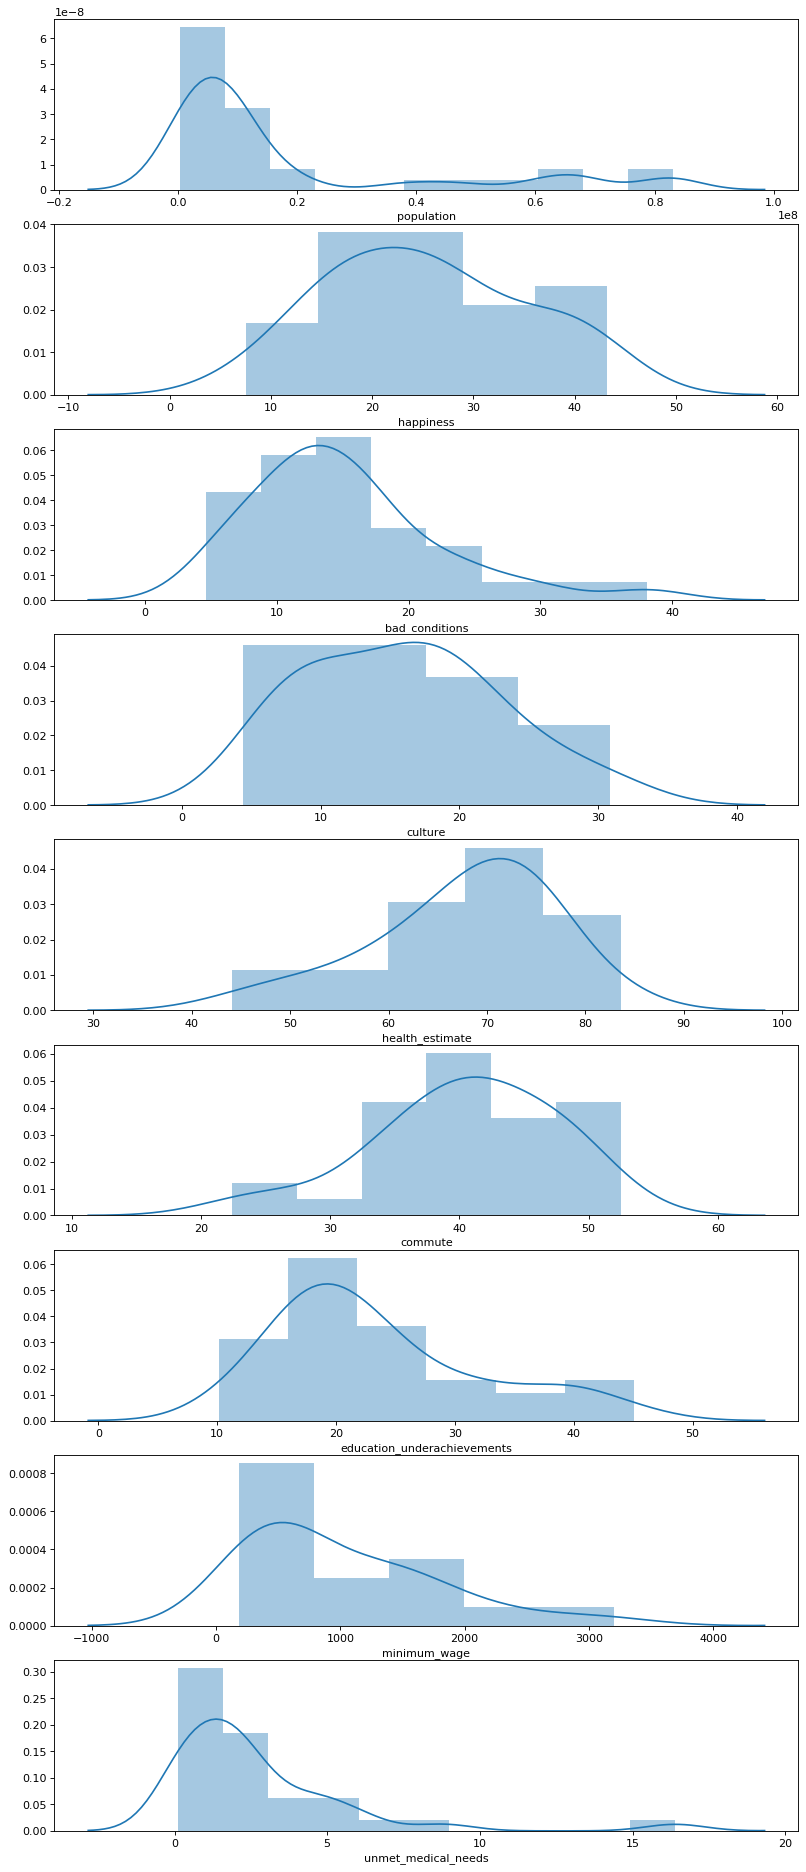

In [19]:
plt.figure(figsize=(12,30), dpi= 80)
i = 1
for col in df.columns.drop("country"):
    plt.subplot(9,1,i)
    i = i + 1
    sns.distplot(df.loc[:, col])

Zgodnie z przewidywaniami, na powyższych wykresach zaobserwować można skośność pozytywną dla cech `population`, `bad_conditions`, `education_underachievements`, `minimum_wage`i `unmet_medical_needs`.

## Tablica korelacji poszczególnych cech:

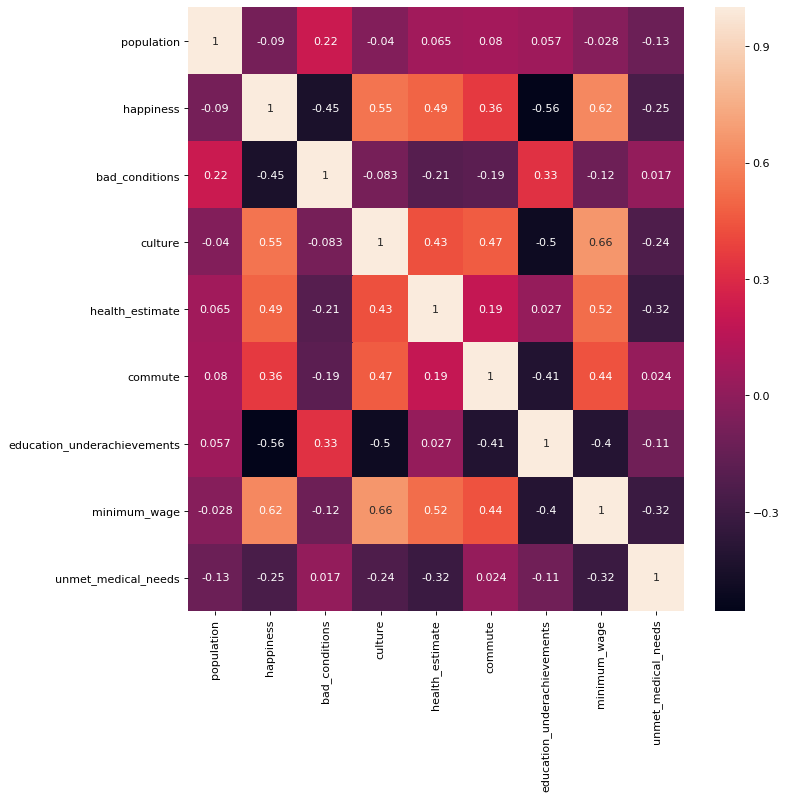

In [21]:
plt.figure(figsize=(10,10),dpi = 80)
sns.heatmap(df.corr(),annot = df.corr())

Z powyższej tablicy korelacji wyciągnąć można następujące wnioski:
<br> - poziom deklarowanego szczęścia jest silnie ujemnie skorelowany ze złymi warunkami mieszkalnymi (bad_conditions)
<br> - poziom deklarowanego szczęścia jest silnie dodatnio skorelowany z aktywnością kulturalną (culture)
<br> - poziom deklarowanego szczęścia jest silnie dodatnio skorelowany z dobrym stanem zdrowia (health_estimate)
<br> - poziom deklarowanego szczęścia jest dość mocno dodatnio skorelowany z czasem poświęconym na dojazdy (commute)
<br> - poziom deklarowanego szczęścia jest silnie ujemnie skorelowany z brakami w wykształceniu (education_underachievements)
<br> - poziom deklarowanego szczęścia jest silnie dodatnio skorelowany z wysokością płacy minimalnej (minimum_wage)
<br><br> Ponadto, poziom deklarowanego szczęścia nie jest skorelowany z populacją oraz jest słabo ujemnie skorelowany z częstością braku satysfakcjonującej opieki zdrowotnej.

In [22]:
df.corr()['happiness'].sort_values()

education_underachievements   -0.556358
bad_conditions                -0.446700
unmet_medical_needs           -0.253131
population                    -0.090328
commute                        0.360781
health_estimate                0.489360
culture                        0.547529
minimum_wage                   0.616758
happiness                      1.000000
Name: happiness, dtype: float64

Widać, żę najwięcej pozytywnego wpływu na zadowolenie z życia w kraju mają cechy `minimum_wage`, `culture` i `health_estimate`.

## Wizualizacja wybranych zależności

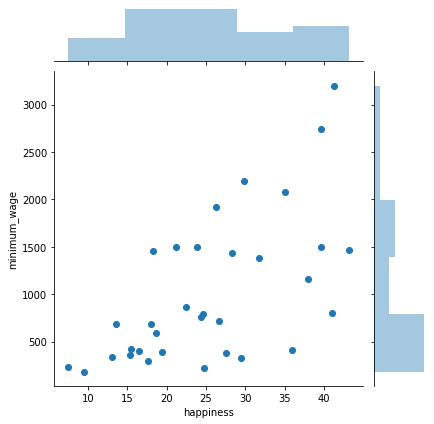

In [34]:
sns.jointplot(data=df, x='happiness', y='minimum_wage')

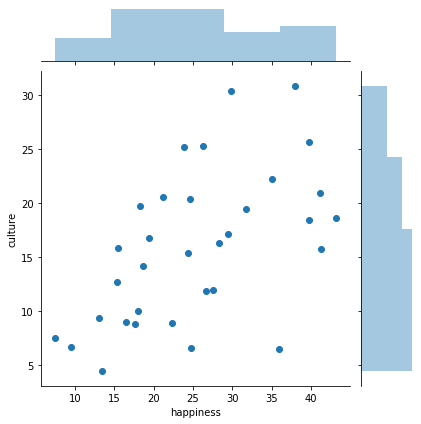

In [20]:
sns.jointplot(data=df, x='happiness', y='culture')

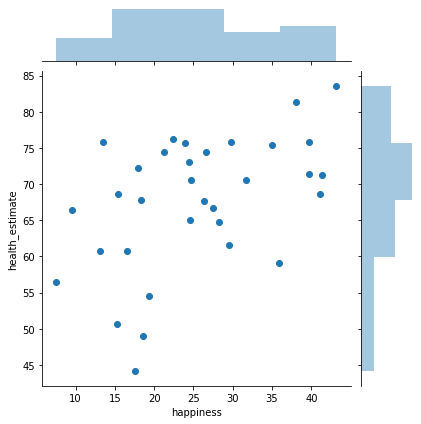

In [22]:
sns.jointplot(data=df, x='happiness', y='health_estimate')

Na powyższych wykresach wyraźnie widoczna jest dodatnia korelacja każdej z par cech. 

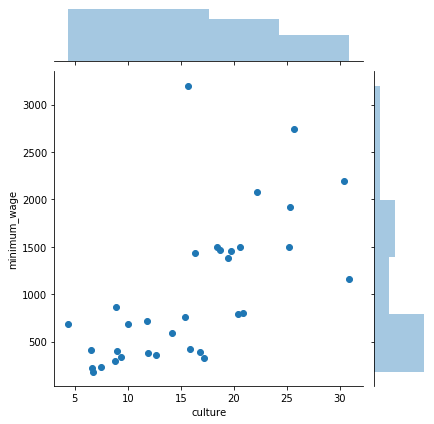

In [40]:
sns.jointplot(data=df, x='culture', y='minimum_wage')

Ponadto, na powyższym wykresie widoczna jest wyraźna zależność pary najbardziej skorelowanych ze sobą cech - aktywności kulturalnej i wysokości płacy minimalnej. 

Aby lepiej zobrazować wybrane zależności, do zbioru dodana została tymczasowo dodatkowa kolumna przypisująca każdemu państwu wysoki, niski lub średni poziom szczęśliwej populacji : 
<br> - procent populacji deklarujący wysoki poziom szczęścia < 15 %
<br> - procent populacji deklarujący wysoki poziom szczęścia > 15 % i < 35 % 
<br> - procent populacji deklarujący wysoki poziom szczęścia > 35 % 

In [94]:
df["happiness_level"] = "medium"
df.loc[(df["happiness"] < 15), "happiness_level"] = "low"
df.loc[(df["happiness"] > 35), "happiness_level"] = "high"

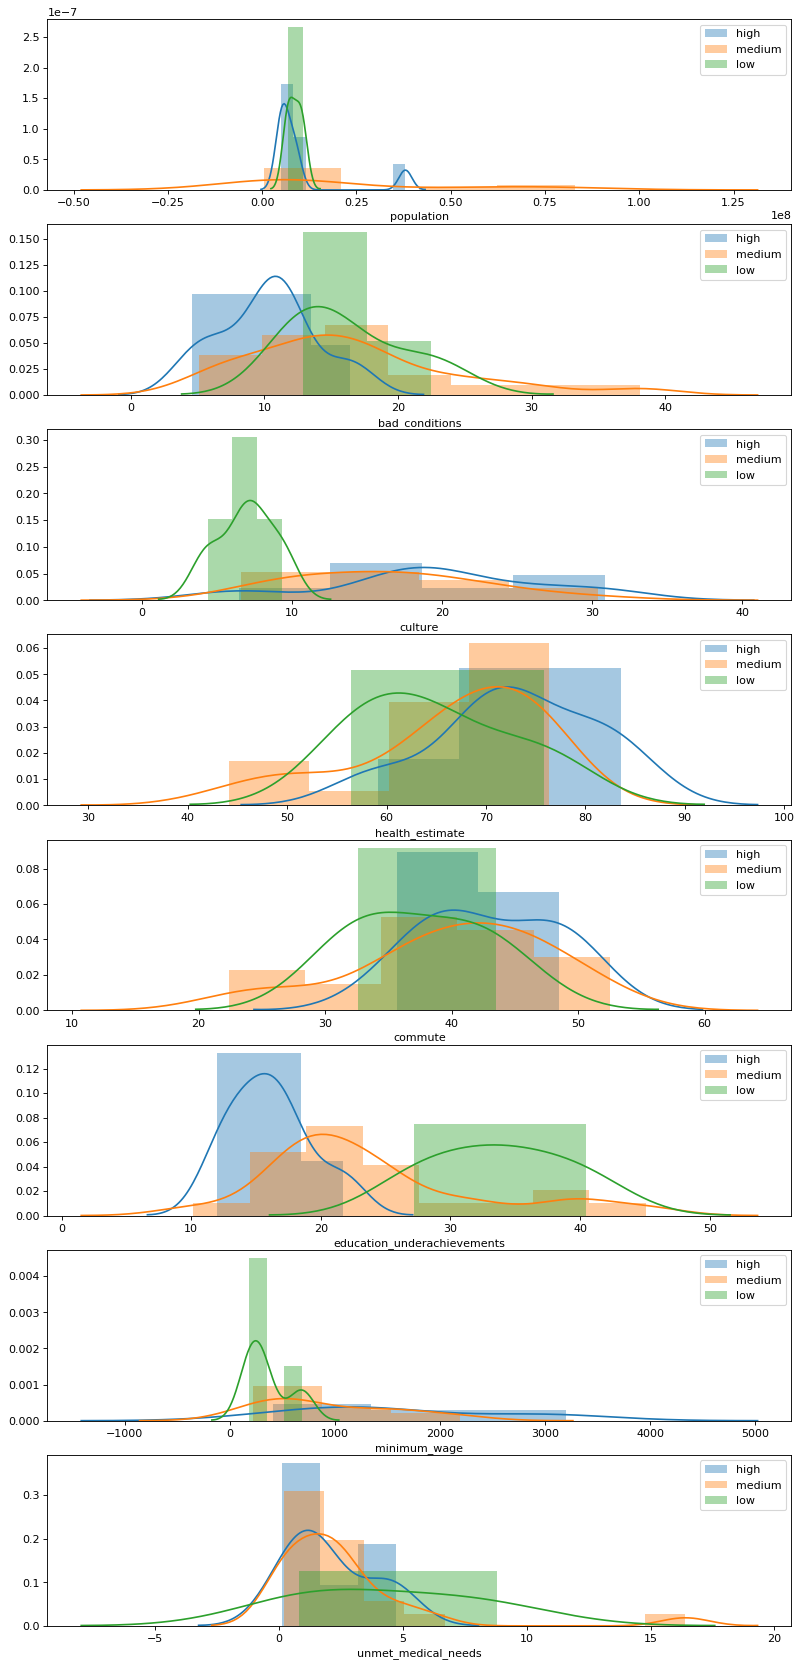

In [95]:
plt.figure(figsize=(12,30), dpi= 80)
i = 1
for col in df.columns.drop("happiness").drop('happiness_level').drop("country"):
    plt.subplot(9,1,i)
    i = i + 1
    for x in df.happiness_level.unique():
        sns.distplot(df.loc[df.happiness_level == x, col], label = (x))
        plt.legend()
        

Powyższy podział posłużył jedynie jako pomoc przy wizualizacji. Dzięki niemu łatwiej zobaczyć można, że im większe braki w wykształceniu w danym kraju (education_underachievements), tym większe prawdopodobieństwo, że poziom deklarowanego szczęścia w kraju jest niski. 
<br>
<br> Ponadto, bardzo niska aktywność kulturalna skutkuje niskim poziomem szczęścia, ale już wysoki poziom aktywności kulturalnej jest cechą zarówno średniego i wysokiego procentu populacji deklarującej wysokie zadowolenie z życia (`happiness`).
<br>
<br> Można też zaobserwować, że bardzo niska płaca minimalna przekłada się na niski poziom deklarowanego szczęścia,

## Zadanie badawcze

Zadanie badawcze opiera się na wyznaczeniu takiego modelu regresji, dla którego na podstawie wskazania wartości atrybutów mówiących o edukacji, aktywności kulturalnej, czy płacy minimalnej, wyestymowany będzie poziom deklarowanego szczęścia w danym kraju.